# INF285 - Computación Científica
# Laboratorio 0 - Contexto
## 21 de marzo de 2025

## 1. Vectorización con Numpy


Una operación está **vectorizada** cuando se aplica sobre un vector como un **todo**. Por el contrario, si una operación se aplica explícitamente sobre cada componente del vector, elemento por elemento, esta operación no está vectorizada.

En Python, si se trabaja con grandes volúmenes de datos organizados en vectores y matrices, **es muy importante vectorizar los algoritmos con NumPy para que el código sea más eficiente**. El código nativo de Python es lento en comparación con otros lenguajes como C, y si no se toma ventaja de la estructura de datos y las operaciones que ofrece NumPy, trabajar con grandes cantidades de datos puede tomar tiempos excesivos.


### 1.1 Ejemplo: sumar dos vectores


Suponga que queremos calcular la suma de dos vectores $\mathbf{z} = \mathbf{x} + \mathbf{y}$, donde $\mathbf{z}$ es un nuevo vector tal que su primer elemento es la suma de los primeros elementos de $\mathbf{x}$ e $\mathbf{y}$, luego el segundo elemento es la suma de los segundos elementos de $\mathbf{x}$ e $\mathbf{y}$, y así sucesivamente.

In [4]:
# cantidad de elementos en cada arreglo
N = 10_000

Creamos una función que genere dos arreglos.

In [2]:
import math
# Input:
#   n:  length of the two arrays to be created
# Output:
#   x:  an array of length n, where x[i] = sqrt(i)
#   y:  an array of length n, where y[i] = i*exp(1)
# Note:
#   exp(1) is the base of the natural logarithm.
def test1_creating_2_arrays_with_append(n):
    x = []
    y = []
    e = math.exp(1)
    for i in range(n):
        x.append(math.sqrt(i))
        y.append(i*e)
    return x, y

Calculamos el tiempo promedio para la función anterior que genera los dos arreglos

In [5]:
T_test1 = %timeit -o test1_creating_2_arrays_with_append(N)

1.79 ms ± 168 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Ahora utilizamos la estructura `ndarray` de Numpy para generar dos arreglos.

In [7]:
import numpy as np
# Input:
#   n:  length of the two arrays to be created
# Output:
#   x:  an array of length n, where x[i] = sqrt(i)
#   y:  an array of length n, where y[i] = i*exp(1)
# Note:
#   exp(1) is the base of the natural logarithm.
def test2_creating_2_arrays_with_numpy(n):
    x = np.sqrt(np.arange(n))
    y = np.arange(n)*np.exp(1)
    return x, y

Calculamos el tiempo promedio para la función anterior que genera los dos arreglos con Numpy.

In [8]:
T_test2 = %timeit -o test2_creating_2_arrays_with_numpy(N)

36.4 μs ± 2.51 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


En el siguiente gráfico podemos observar la diferencia de utilizar ambas funciones.

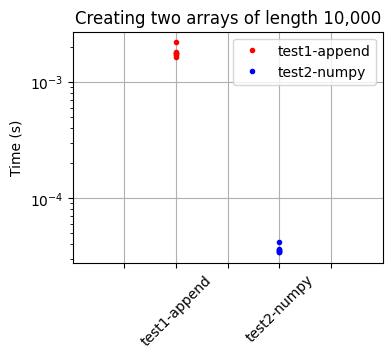

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.semilogy(1*np.ones(len(T_test1.timings)),T_test1.timings,'r.',label='test1-append')
plt.semilogy(2*np.ones(len(T_test2.timings)),T_test2.timings,'b.',label='test2-numpy')
plt.grid(True)
plt.legend(loc='best')
plt.ylabel('Time (s)')
plt.title('Creating two arrays of length 10,000')
plt.xlim(0,3)
plt.xticks([0.5,1,1.5,2,2.5],['','test1-append','','test2-numpy',''],rotation=45)
plt.show()

Ahora vamos a crear funciones que sumen ambos arreglos de forma no vectorizada (utilizando listas)

In [11]:
# Suma no vectorizada de x e y, usando un bucle for.
def test3_add_two_arrays_not_vectorized(x, y):
    z = []
    for i in range(len(x)):
        z.append(x[i] + y[i])
    return z

Calculamos el tiempo promedio para la función anterior.

In [12]:
x, y = test1_creating_2_arrays_with_append(N)
T_test3 = %timeit -o test3_add_two_arrays_not_vectorized(x, y)

654 μs ± 55.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


También es posible realizar la operación anterior usando una **comprensión de lista** (list comprehension), la cual crea directamente una lista donde cada elemento sigue un formato específico, en este caso `x[i] + y[i]`:

In [13]:
# Suma no vectorizada de x e y, usando una comprension de lista.
def test4_add_two_arrays_with_compherension_list(x, y):
    return [x[i] + y[i] for i in range(len(x))]

Calculamos el tiempo promedio para la función anterior.

In [14]:
T_test4 = %timeit -o test4_add_two_arrays_with_compherension_list(x, y)

627 μs ± 47.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Una tercera opción sería usar la función `map`, que aplica una función sobre todos los elementos de uno o más iterables, retornando un nuevo iterable. En este caso, se aplica sobre $\mathbf{x}$ e $\mathbf{y}$ una función que toma dos valores y retorna su suma:

In [15]:
# Suma no vectorizada de x e y, usando la funcion map.
funcion = lambda elem1, elem2: elem1 + elem2
def test5_add_two_arrays_with_map(x, y):
    return list(map(funcion, x, y))

Calculamos el tiempo promedio para la función anterior.

In [16]:
T_test5 = %timeit -o test5_add_two_arrays_with_map(x, y)

891 μs ± 40.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Sin embargo, ninguna de las tres opciones anteriores es un **algoritmo vectorizado**. Una suma de dos vectores utilizando un algoritmo vectorizado se debe aplicar de la siguiente manera:

In [17]:
x,y = test2_creating_2_arrays_with_numpy(N)
T_test6 = %timeit -o z = x + y

5 μs ± 596 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


En el siguiente gráfico podemos observar la diferencia de utilizar las funciones anteriores para sumar dos arreglos.

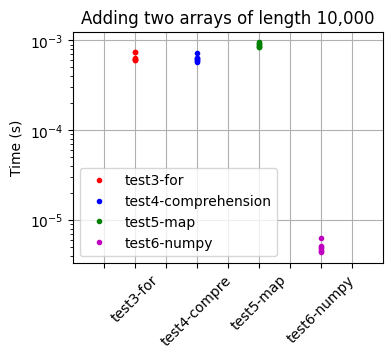

In [18]:
plt.figure(figsize=(4, 3))
plt.semilogy(1*np.ones(len(T_test3.timings)),T_test3.timings,'r.',label='test3-for')
plt.semilogy(2*np.ones(len(T_test4.timings)),T_test4.timings,'b.',label='test4-comprehension')
plt.semilogy(3*np.ones(len(T_test5.timings)),T_test5.timings,'g.',label='test5-map')
plt.semilogy(4*np.ones(len(T_test6.timings)),T_test6.timings,'m.',label='test6-numpy')
plt.grid(True)
plt.legend(loc='best')
plt.ylabel('Time (s)')
plt.title('Adding two arrays of length 10,000')
plt.xlim(0,5)
plt.xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5],['','test3-for','','test4-compre','','test5-map','','test6-numpy',''],rotation=45)
plt.show()

Notar que en el código solo se escribe la suma directa entre $\mathbf{x}$ e $\mathbf{y}$.
A diferencia del primer código, no se hace explícita la operación de sumar componente por componente para obtener el nuevo vector.

La operación queda implícita, y es abstraída por la suma directa `x + y` en el código. 
Esta suma se aplica sobre los vectores $\mathbf{x}$ e $\mathbf{y}$ como un todo, por lo que se dice que está vectorizada.

## 2. Numpy

NumPy es una librería para trabajar en Python con vectores, matrices y en general arreglos $n$-dimensionales, de manera eficiente. NumPy define su propio tipo de dato: `numpy.ndarray`, un arreglo $n$-dimensional que tiene diferencias notables con las listas de Python. Una manera de crear un `ndarray` es usando el método `numpy.array`, al cual se le puede entregar una lista de Python. Vamos a revisar algunos conceptos fundamentales de Numpy (revisar <a href="https://www.nature.com/articles/s41586-020-2649-2">Array programming with NumPy</a>)
Primero vamos a importar la librería:

In [2]:
import numpy as np

Vamos a crear un vector $\mathbf{x}$ y una matriz $A$:

In [3]:
x = np.array([7.,8.,9.,10.,11.,12.])
A = np.array([[1.,2.,3.],[4.,5.,6.]])

### 2.1 Conceptos fundamentales

### a) Estructura de Datos

Podemos obtener la información de la estructura de datos `ndarray`, tales como el tipo de datos que se encuentra en el arreglo así como también las dimensiones.

![title](img/a_data_structure.png)

In [21]:
print(' Valores: ')
print('x:\n',x)
print('A:\n',A)

print(' \nTipo de datos: ')
print('x:\n',x.dtype)
print('A:\n',A.dtype)

print(' \nEstructura de datos: ')
print('x:\n',type(x).__name__)
print('A:\n',type(A).__name__)

print(' \nDimensiones: ')
print('x:\n',x.shape)
print('A:\n',A.shape)

 Valores: 
x:
 [ 7.  8.  9. 10. 11. 12.]
A:
 [[1. 2. 3.]
 [4. 5. 6.]]
 
Tipo de datos: 
x:
 float64
A:
 float64
 
Estructura de datos: 
x:
 ndarray
A:
 ndarray
 
Dimensiones: 
x:
 (6,)
A:
 (2, 3)


### b) Indexación (view)

![title](img/b_indexacion.png)

Para explicar cómo funciona la indexación (view), vamos a crear un arreglo de dimensión $4 \times 3$ (una matriz):

In [43]:
A = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print(' Valores: ')
print('A:\n',A)

 Valores: 
A:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


Vamos a mostrar solamente la **segunda y tercera** columna de la matriz utilizando **slices** y vamos a almacenar esos valores en otro arreglo:

In [ ]:
print('B = A[:,1:]\n')
print(A[:,:1])
B = A[:,1:]

B = A[:,1:]

[[ 1  2]
 [ 8  9]
 [11 12]
 [ 6  7]]


Cuando hablamos de **view** se refiere a que el arreglo $B$ es una *vista* de los valores de $A$ seleccionados. Vamos a modificar un valor del arreglo $A$ y veamos qué sucede con el arreglo $B$:

In [ ]:
A[0,1] = 99
print('A:\n',A)
print('\nB:\n',B)

El valor en el arreglo $B$ también se ha modificado!

Para evitar estas confusiones, podemos utilizar el método `numpy.copy()`:

In [11]:
C = np.copy(A[:,1:])

#volvemos al valor original
A[0,1] = 1
print('A:\n',A)
print('\nB:\n',B)
print('\nC:\n',C)

A:
 [[ 0  1  2]
 [ 7  8  9]
 [10 11 12]
 [ 4  6  7]]

B:
 [[ 1  2]
 [ 8  9]
 [11 12]
 [ 6  7]]

C:
 [[ 1  2]
 [ 8  9]
 [11 12]
 [ 6  7]]


Podemos observar que el arreglo $C$ no sufre modificaciones.

El **slice** también nos permite trabajar con los **steps**, es decir, podemos acceder a los valores de los arreglos (a lo largo de algún eje) *saltando* cierta cantidad de pasos. Por ejemplo, en la siguiente instrucción accedemos a la **primera y tercera** columna del arreglo $A$:

In [12]:
print('A[:,::2]\n')
print(A[:,::2])

A[:,::2]

[[ 0  2]
 [ 7  9]
 [10 12]
 [ 4  7]]


### c) Indexación (copy)

![title](img/c_indexacion.png)

Para explicar cómo funciona la indexación (copy), seguiremos trabajando con el mismo arreglo $A$ de dimensión $4 \times 3$. En esta parte veremos varias opciones para "copiar" los datos desde las estructuras `ndarray`

In [ ]:
print('A:\n')
print(A)

**Con escalares:**

In [ ]:
u = A[1,2]

print('u:\n')
print(u)

Notar que si modificamos el valor de $u$, no se modifica el arreglo $A$:

In [ ]:
u = 999
print('u:\n')
print(u)
print('\nA:\n')
print(A)

**Con máscaras (MASKS)**:

In [ ]:
v = A[A > 9]

print('v:\n')
print(v)

**Con arreglos (arrays):**

In [ ]:
w = A[[0,1],[1,2]]

print('w:\n')
print(w)

**Con arreglos (arrays) y broadcasting:**

In [ ]:
z = A[[[1],[2]],[1,0]]

print('z:\n')
print(z)

### d) Vectorización

![title](img/d_vectorizacion.png)

Para entender este punto, veamos un ejemplo en donde vamos a sumar dos arreglos, cada uno de dimensión $4 \times 3$.

In [4]:
A = np.array([[0,1,2],[7,8,9],[10,11,12],[4,6,7]])
B = np.array([[3,4,5],[1,3,5],[0,9,3],[9,10,12]])

print('A:\n')
print(A)
print('\nB:\n')
print(B)

A:

[[ 0  1  2]
 [ 7  8  9]
 [10 11 12]
 [ 4  6  7]]

B:

[[ 3  4  5]
 [ 1  3  5]
 [ 0  9  3]
 [ 9 10 12]]


Una primera implementación sería recorrer cada arreglo y sumar elemento a elemento:

In [5]:
def sumar_dos_arreglos(A,B):
    C = np.zeros_like(A) # What does this function do?
    for i in range(4):
        for j in range(3):
            C[i,j] = A[i,j] + B[i,j]
    return C

C = sumar_dos_arreglos(A,B)
print('C:\n')
print(C)

C:

[[ 3  5  7]
 [ 8 11 14]
 [10 20 15]
 [13 16 19]]


Veamos el tiempo promedio de la función anterior:

In [6]:
t_1 = %timeit -o sumar_dos_arreglos(A,B)

10.1 μs ± 737 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Veamos ahora el tiempo promedio con Numpy, es decir, utilizando vectorización:

In [7]:
t_2 = %timeit -o A + B

642 ns ± 53.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Podemos calcular cuántas veces es más rápido la vectorización sobre el cálculo de la suma con doble ciclo for.

In [13]:
t_1.average/t_2.average

15.756025499133413

**Es muy importante, dado el análisis anterior, familiarizarse con la vectorización de Numpy**

### e) Broadcasting

![title](img/e_broadcasting.png)

Comenzaremos creando un arreglo 1D, esta es la forma más recomendada para crear *vectores* con Numpy. Esto simula un *vector fila*.

In [14]:
x1 = np.array([1,2,3])
print('x1:',x1)
print('shape:',x1.shape)
print('dtype:',x1.dtype)
print('type name:',type(x1).__name__)

x1: [1 2 3]
shape: (3,)
dtype: int64
type name: ndarray


Creamos un arreglo 2D con una fila.

In [ ]:
x2 = x1[np.newaxis] # What does np.newaxis do?, Agrega una nueva dimensión al arreglo. [<- [1,2,3] ->]
print('x2:',x2)
print('x1', x1)
print('shape:',x2.shape)
print('dtype:',x2.dtype)
print('type name:',type(x2).__name__)

x2: [[1 2 3]]
x1 [1 2 3]
shape: (1, 3)
dtype: int64
type name: ndarray


Ahora transponemos el arreglo 2D. Esto simula un *vector columna*.

In [18]:
x2 = x1[np.newaxis].T #.T causa la transposición de la matriz
print('x2:\n',x2)
print('shape:',x2.shape)
print('dtype:',x2.dtype)
print('type name:',type(x2).__name__)

x2:
 [[1]
 [2]
 [3]]
shape: (3, 1)
dtype: int64
type name: ndarray


Ahora que tenemos un arreglo 1D que simula un vector fila y otro que simula un vector columna, podemos realizar un **BROADCAST** y ver qué sucede.  

In [ ]:
print('x1:',x1)
print('\nx2:\n',x2)

x3 = x1 + x2
print('\nx3:\n',x3)
print('shape:',x3.shape)
print('dtype:',x3.dtype)
print('type name:',type(x3).__name__)

x1: [1 2 3]

x2:
 [[1]
 [2]
 [3]]

x3:
 [[2 3 4]
 [3 4 5]
 [4 5 6]]
shape: (3, 3)
dtype: int64
type name: ndarray


Lo anterior es equivalente a las siguientes instrucciones:

In [24]:
# Repeat the 1d array 'vertically' 3 times.
x11 = np.tile(x1, (3,1)) 
print('x11:\n',x11)

# Repeat the 2d array 'horizontally' 3 times.
x21 = np.tile(x2, 3) 
print('\nx21:\n',x21)

x31 = x11 + x21
print('\nx31:\n',x31)
print('shape:',x31.shape)
print('dtype:',x31.dtype)
print('type name:',type(x31).__name__)

x11:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]

x21:
 [[1 1 1]
 [2 2 2]
 [3 3 3]]

x31:
 [[2 3 4]
 [3 4 5]
 [4 5 6]]
shape: (3, 3)
dtype: int64
type name: ndarray


Como ustede debe sospechar, la forma anterior no es la recomendable para sumar, se incluye como una forma de comparar utilizando *broadcasting*.

Veamos otro ejemplo utilizando *broadcasting* para un producto:

In [25]:
y = np.array([0,3,6,9])

y1 = y[np.newaxis].T
print('y1:\n',y1)

y2 = np.array([1,2])
print('\ny2:\n',y2)

y3 = y1 * y2
print('\ny3:\n',y3)

y1:
 [[0]
 [3]
 [6]
 [9]]

y2:
 [1 2]

y3:
 [[ 0  0]
 [ 3  6]
 [ 6 12]
 [ 9 18]]


### f) Reduction

![title](img/f_reduction.png)

Las reducciones consisten en *reducir* la dimensionalidad con respecto a la estructura original. A continuación se muestran algunos ejemplos:

In [26]:
X = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print('X:\n',X)

print('\nSumar a lo largo del eje 0 (axis = 0):')
print('s1 = np.sum(X,axis=0)')
s1 = np.sum(X,axis=0)
print('\ns1:\n',s1)
print('shape:',s1.shape)
print('dtype:',s1.dtype)
print('type name:',type(s1).__name__)

print('\nSumar a lo largo del eje 1 (axis = 1):')
print('s2 = np.sum(X,axis=1)')
s2 = np.sum(X,axis=1)
print('\ns2:\n',s2)
print('shape:',s2.shape)
print('dtype:',s2.dtype)
print('type name:',type(s2).__name__)

print('\nSumar a lo largo del eje 0 y 1 (axis = 0 y 1):')
print('s3 = np.sum(X)')
s3 = np.sum(X)
print('\ns3:\n',s3)
print('shape:',s3.shape)
print('dtype:',s3.dtype)
print('type name:',type(s3).__name__)

X:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

Sumar a lo largo del eje 0 (axis = 0):
s1 = np.sum(X,axis=0)

s1:
 [18 22 26]
shape: (3,)
dtype: int64
type name: ndarray

Sumar a lo largo del eje 1 (axis = 1):
s2 = np.sum(X,axis=1)

s2:
 [ 3 12 21 30]
shape: (4,)
dtype: int64
type name: ndarray

Sumar a lo largo del eje 0 y 1 (axis = 0 y 1):
s3 = np.sum(X)

s3:
 66
shape: ()
dtype: int64
type name: int64


### 2.2 Por qué vectorizar operaciones con NumPy

La ejecución de los programas de Python es más lenta en comparación a programas escritos en otros lenguajes como C. Esto se debe a varias razones: por ejemplo, Python es dinámicamente tipado, es decir, los tipos de cada objeto se verifican en tiempo de ejecución, lo que hace difícil optimizar el código de antemano.

En Python, todo es un objeto, incluyendo enteros, flotantes, funciones, etc. Cada objeto es un PyObject en C, que contiene información sobre la clase del objeto, sus atributos, métodos, etc. Debido a que incluso tipos de datos tan elementales como los enteros son objetos con varios metadatos, trabajar con ellos es más costoso.

Por otra parte, las listas nativas de Python contienen objetos que pueden ser de cualquier tipo: se puede mezclar enteros, funciones, booleanos, etc. en una misma lista. Las listas contienen un arreglo de punteros que apuntan a los PyObjects, por lo que sus datos no están contiguos en memoria, además de tener mucha información extra, lo cual hace más costoso acceder a los datos y realizar operaciones con ellos.

Es por esto, que usar bucles for, comprensiones de lista o la función `map` en Python para realizar operaciones sobre listas de Python es muy ineficiente, y hay que buscar alternativas a esto.



NumPy soluciona estos problemas:

* Los ndarrays de NumPy son similares a los arreglos de C,** que contienen directamente los datos de un solo tipo de dato. Existen ndarrays de solo ints, de solo floats, etc. Todos estos datos están contiguos en memoria, no tienen metadatos adicionales, y en general usar ndarrays es más eficiente que usar listas de Python.

* Las operaciones vectorizadas que permite hacer NumPy, trabajan por detrás con código precompilado en C.** Por ejemplo, la suma de dos vectores de enteros en NumPy implica trabajar por detrás sumando componente por componente, pero todo esto se realiza en el rápido lenguaje C, con el tipo de dato int, sin incurrir en costos extra de crear PyObjects, lo cual es mucho más eficiente. Compárese esto con sumar componente por componente en Python, que sí tiene esos costos.

Veamos ahora algunas operaciones comunes en Numpy:

**Sumar una constante a todos los elementos de un arreglo**

In [27]:
x = np.array([2., 1., -3., 5., 8.])
x + 5

print(f"x:{x}")

x:[ 2.  1. -3.  5.  8.]


**Sumar o multiplicar todos los elementos de un arreglo**

In [28]:
np.sum([1, 2, 3, 4, 5]) # retorna 1 + 2 + 3 + 4 + 5 = 15.

np.int64(15)

In [29]:
np.prod([1, 2, 3, 4, 5]) # retorna 1*2*3*4*5 = 120.

np.int64(120)

**Obtener el logaritmo natural (en base $e$) de todos los elementos de un arreglo**

In [30]:
np.log(2)

np.float64(0.6931471805599453)

In [31]:
np.log([1., 2., 3., 4., 5.])

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

**Producto interno (o punto) entre dos vectores**

In [32]:
x = np.array([2., 10., 3.])
y = np.array([-1., 1., 4.])
np.dot(x, y)

np.float64(20.0)

In [ ]:
x @ y # el operador @ (matrix multiplication) tambien sirve para el producto punto.

**Producto matriz-vector**

In [33]:
A = np.array([[1., 2., 3.], [-2., 3., 4.]])
print(f"A:{A}")

x = np.array([2., 1., -6.])
print(f"x:{x}")

A:[[ 1.  2.  3.]
 [-2.  3.  4.]]
x:[ 2.  1. -6.]


In [34]:
np.dot(A, x)

array([-14., -25.])

In [35]:
A @ x # el operador @ (matrix multiplication) tambien sirve.

array([-14., -25.])

**Calcular potencias de arreglos**

In [36]:
np.power(3., 4.) # eleva el primer argumento al segundo argumento.

np.float64(81.0)

In [37]:
np.power([1., 2., 3., 4.], 2.) # eleva los elementos del ndarray a 2: [1^2, 2^2, 3^2, 4^2].

array([ 1.,  4.,  9., 16.])

In [38]:
np.power(2., [1., 2., 3., 4.]) # eleva 2 a los elementos del ndarray: [2^1, 2^2, 2^3, 2^4].

array([ 2.,  4.,  8., 16.])

In [39]:
np.power([1., 2., 3.], [4., 5., 6.]) # produce [1^4, 2^5, 3^6].

array([  1.,  32., 729.])

**Encontrar la norma de un vector**

In [40]:
x = np.array([3., 4.])

np.linalg.norm(x) # raiz(3^2 + 4^2) = raiz(25) = 5.

np.float64(5.0)

In [41]:
A = np.array([[3, 4], [1, 2], [3, 1]])

print(f"A:{A}")

A:[[3 4]
 [1 2]
 [3 1]]


In [42]:
np.linalg.norm(A, axis=0) # obtiene la norma de los 2 vectores columna (eje externo).

array([4.35889894, 4.58257569])

In [43]:
np.linalg.norm(A, axis=1) # obtiene la norma de los 3 vectores fila (eje interno).

array([5.        , 2.23606798, 3.16227766])

**Comparar cuáles elementos de un vector cumplen una condición**

In [44]:
x = np.array([2, 4, 6, 8, 1])

x > 5 # cuales elementos son mayores a 5: True si el elemento es mayor a 5, False si no.

array([False, False,  True,  True, False])

También podemos saber cuántos elementos cumplen la condición

In [45]:
np.sum(x > 5)

np.int64(2)

**Vectorizar una función propia**

En algunos casos construimos funciones que luego deben ser ejecutadas sobre algún arreglo. El siguiente código por ejemplo, calcula el valor absoluto de la resta entre dos números mediante un condicional.

In [46]:
def restaAbs(a,b):
    if a > b:
        return a - b
    else:
        return b - a

In [47]:
#ejecutamos la función para a = 9 y b = 12
a,b = 9,12
restaAbs(a,b)

3

No hay problema en ejecutar nuestra función sobre un par de valores, pero ¿Qué sucede si ahora quiero ejecutar la función sobre varios valores de un `np.array`?

In [48]:
a = np.array([1, 5, 9, 15])
b = 7
restaAbs(a,b)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**Tenemos un error!** ya que el parámetro `a` es un `ndarray` y nuestra función no recibe ese tipo de datos.
Entonces debemos recurrir a la función `numpy.vectorize`, la cual crea una nueva función que permite ejecutar nuestra función **element-wise**, es decir, elemento a elemento.

In [49]:
restaAbs_vec = np.vectorize(restaAbs)
a = np.array([1, 5, 9, 15])
b = 7
restaAbs_vec(a,b)

array([6, 2, 2, 8])

**No hay errores!** ya que ahora utilizamos la función vectorizada.

Debido a la importancia de NumPy, existe una buena cantidad de material de aprendizaje en Internet, por lo que se recomienda investigar y seguir cursos de NumPy para aprender por su cuenta.
Se sugiere revisar la documentación de Numpy en https://numpy.org/doc/stable/.

### Sobre "double precision" en NumPy

Considere el siguiente código:

In [55]:
# Creacion de 2 arreglos de NumPy
a = np.array([1, 2])
b = np.array([1, 2.])

# Determinar el tipo de dato almacenado en los segundos elementos de cada arreglo
print(type(a[0]))
print(type(b[0]))

<class 'numpy.int64'>
<class 'numpy.float64'>


Esto quiere decir que NumPy almacena el arreglo `b` como un arreglo en "double precision" si por lo menos algún elemento es un número de punto flotante, en este caso `1.`, que es el primer elemento.

El detalle acá es que se le agrega un punto al lado de `1` para asegurar que se interprete como `float64`. El no incluir el punto decimal hace que NumPy almacene el arreglo como un arreglo de enteros `int64`, que es el caso del arreglo `a`.

Y si los coeficientes de un arreglo se almacenan como enteros, no aplica lo que sabemos de aritmética de punto flotante en "double precision".

### Errores comunes: ¿Qué no cuenta como vectorización?

Algunos errores comunes que se confunden con vectorización son:

* Usar comprensiones de lista:

In [56]:
cuadrado = [x[i]**2 for i in range(len(x))]

* Usar la función map de Python:

In [57]:
cuadrado = list(map(lambda elem: elem**2, x))

Ninguna de estas operaciones está vectorizada con NumPy, y sigue estando explícita la operación de elevar cada elemento de `x` al cuadrado.

Si se introduce una comprensión de lista o un map en el método `np.array`:

In [ ]:
cuadrado = np.array([x[i]**2 for i in range(len(x))])

el resultado **sigue sin ser una operación vectorizada**. El solo hecho de usar `np.array` no significa que el algoritmo usado para generar esa lista esté vectorizado correctamente. En general, hacer algo como esto:

In [ ]:
arr = []
# Codigo no vectorizado para generar los elementos de arr.
arr = np.array(arr)

**no cuenta como vectorización, y es un error común. La vectorización no se trata de los arreglos usados (si se usan arreglos de NumPy o no), sino de las operaciones (si estas son capaces de recibir vectores y aplicarse sobre estos como un todo, usando los trucos de eficiencia ofrecidos por NumPy).**

La siguiente sí es una solución vectorizada, pues se aplica sobre el vector como un todo, abstrayendo los detalles de "elevar elemento por elemento al cuadrado", y usa las operaciones eficientes de NumPy:

In [ ]:
cuadrado = np.power(x,2.)

## Agradecimientos

* Parte de este notebook está basado en las explicaciones del estudiante Francisco Manríquez incluidas en los reglamentos de Tareas 2023-2024 de la asignatura.
* Parte de este notebook también es del material originalmente creado por el professor Claudio Torres (`ctorres@inf.utfsm.cl`) denominado _Bonus - 00 - The beginning_